In [254]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from numpy import std
from mlxtend.plotting import scatterplotmatrix
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [255]:
def get_whole_dataset(path):
    all_filenames = [i for i in glob.glob(os.path.join(path, "*.csv"))]
    df_from_each_file = [pd.read_csv(f, header=None, names=['time', 'sv', 'ax', 'ay', 'az']) for f in all_filenames]
    return pd.concat(df_from_each_file, axis=0, ignore_index = True)

In [256]:
df_adl = get_whole_dataset("DatasetDesafio/ADL/Train")
df_adl_test = get_whole_dataset("DatasetDesafio/ADL/Test")
df_fall = get_whole_dataset("DatasetDesafio/Fall/Train")
df_fall_test = get_whole_dataset("DatasetDesafio/Fall/Test")

In [257]:
df_adl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13524 entries, 0 to 13523
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    13524 non-null  int64  
 1   sv      13524 non-null  float64
 2   ax      13524 non-null  float64
 3   ay      13524 non-null  float64
 4   az      13524 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 528.4 KB


In [258]:
df_fall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4646 entries, 0 to 4645
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    4646 non-null   int64  
 1   sv      4646 non-null   float64
 2   ax      4646 non-null   float64
 3   ay      4646 non-null   float64
 4   az      4646 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 181.6 KB


In [259]:
df_adl.shape[0]

13524

In [260]:
df_adl.shape[1]

5

In [261]:
df_adl['fall'] = 0
df_fall['fall'] = 1

df = pd.concat([df_adl, df_fall])
df.info()
df = shuffle(df)
df = df.reset_index(drop=True)
print(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18170 entries, 0 to 4645
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    18170 non-null  int64  
 1   sv      18170 non-null  float64
 2   ax      18170 non-null  float64
 3   ay      18170 non-null  float64
 4   az      18170 non-null  float64
 5   fall    18170 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 993.7 KB
       time        sv        ax        ay        az  fall
0      4693  0.931092 -0.929688 -0.015137  0.048828     0
1      2348  0.970360 -0.282247  0.514136  0.773046     0
2       436  0.897787 -0.883301  0.134766  0.087402     0
3      5336  1.116076  0.343167  0.930751 -0.511434     0
4      2355  0.923263 -0.016950  0.922644 -0.029232     0
...     ...       ...       ...       ...       ...   ...
18165  5522  0.942763 -0.085485  0.775748 -0.528875     0
18166  3344  1.061216 -0.484413 -0.310496  0.891693     1
18167   422  1.115102  

In [262]:
df.describe()

,time,sv,ax,ay,az,fall
count,18170.000000,18170.000000,18170.000000,18170.000000,18170.000000,18170.000000
mean,3710.076555,1.068593,-0.062843,0.610042,0.071270,0.255696
std,2898.846788,0.373168,0.545089,0.536216,0.561351,0.436264
min,-2187.000000,0.075623,-7.385576,-6.507885,-8.049310,0.000000
25%,1443.000000,0.962333,-0.322225,0.242268,-0.212483,0.000000
50%,3003.000000,1.024772,0.023828,0.833229,0.071777,0.000000
75%,5521.000000,1.115919,0.222063,0.972940,0.313198,1.000000
max,13575.000000,11.401265,8.010252,4.596026,8.019095,1.000000


In [263]:
df.groupby(["fall"]).ax.mean().to_frame()

,ax
fall,
0,-0.082243
1,-0.006371


In [264]:
df.groupby(["fall"]).ay.mean().to_frame()

,ay
fall,
0,0.706781
1,0.328447


In [265]:
df.groupby(["fall"]).az.mean().to_frame()

,az
fall,
0,-0.020146
1,0.337372


In [266]:
df.groupby(["fall"]).sv.mean().to_frame()

,sv
fall,
0,1.039005
1,1.154722


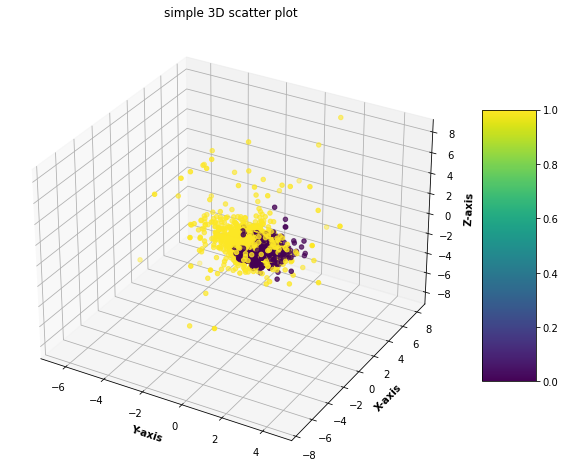

In [267]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(df['ay'], df['ax'], df['az'], c=df['fall'])


plt.title("simple 3D scatter plot")
ax.set_xlabel('Y-axis', fontweight ='bold')
ax.set_ylabel('X-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.show()

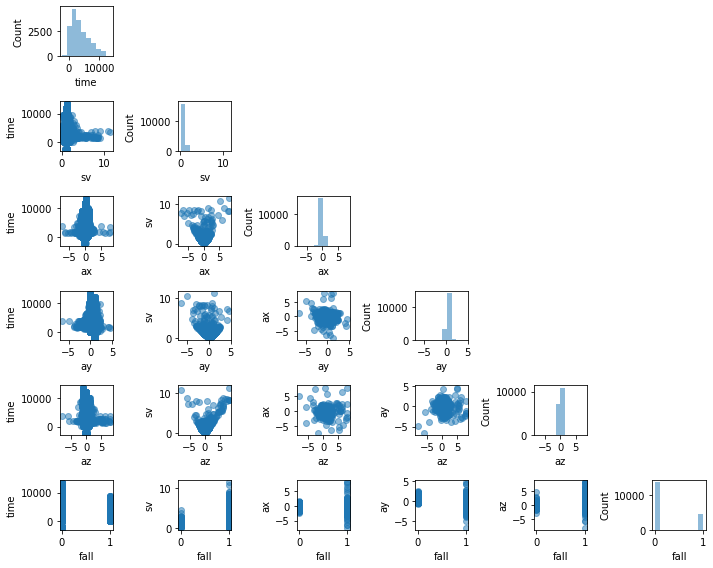

In [268]:
scatterplotmatrix(df.values, figsize=(10, 8), 
                  names=df.columns.values.tolist(), alpha=0.5)
plt.tight_layout()
#plt.savefig('images/10_03.png', dpi=300)
plt.show()

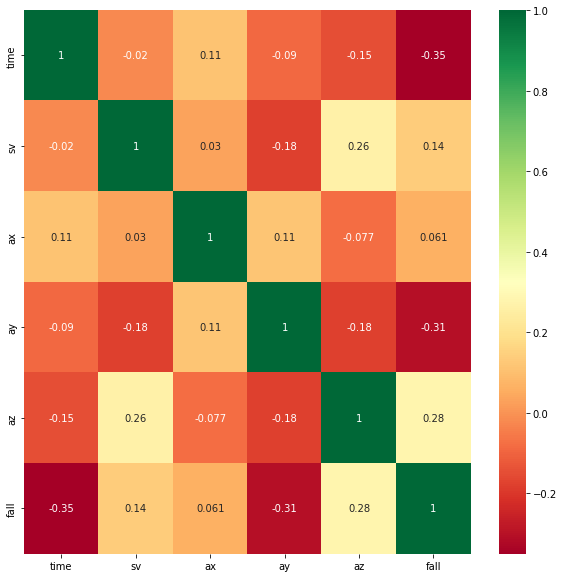

In [269]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### SVM, Decision tree e random forest com grid search e cross validation

In [270]:
X = df.loc[:, 'sv':'az'].values
y = df.loc[:, 'fall'].values

In [271]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

In [272]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.799


In [273]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8766513526536663
{'svc__C': 1.0, 'svc__gamma': 10.0, 'svc__kernel': 'rbf'}


In [274]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), 
                                      np.std(scores)))

CV accuracy: 0.836 +/- 0.003


In [275]:
df['max_value'] = df[['ax', 'ay', 'az']].max(axis=1)
df['min_value'] = df[['ax', 'ay', 'az']].min(axis=1)
df['mean_value'] = df[['ax', 'ay', 'az']].mean(axis=1)
df['std'] = df[['ax', 'ay', 'az']].std(axis=1)
df['sum_x_y'] = df['ax'] + df['ay']
df['sum_x_z'] = df['ax'] + df['az']
df['sum_y_z'] = df['ay'] + df['az']
df['log_az'] = np.log(df["az"] + 1 - df['az'].min(axis=0))
df['log_ax'] = np.log(df["ax"] + 1 - df['ax'].min(axis=0))
df['log_ay'] = np.log(df["ay"] + 1 - df['ay'].min(axis=0))
df['log_sv'] = np.log(df["sv"] + 1 - df['sv'].min(axis=0))
df

,time,sv,ax,ay,az,fall,max_value,min_value,mean_value,std,sum_x_y,sum_x_z,sum_y_z,log_az,log_ax,log_ay,log_sv
0,4693,0.931092,-0.929688,-0.015137,0.048828,0,0.048828,-0.929688,-0.298665,0.547416,-0.944824,-0.880859,0.033691,2.208070,2.009004,2.013936,0.618138
1,2348,0.970360,-0.282247,0.514136,0.773046,0,0.773046,-0.282247,0.334978,0.549985,0.231889,0.490800,1.287182,2.284661,2.092275,2.082190,0.639080
2,436,0.897787,-0.883301,0.134766,0.087402,0,0.134766,-0.883301,-0.220378,0.574597,-0.748535,-0.795898,0.222168,2.212301,2.015206,2.033744,0.600025
3,5336,1.116076,0.343167,0.930751,-0.511434,0,0.930751,-0.511434,0.254161,0.725200,1.273917,-0.168267,0.419317,2.144512,2.166621,2.132821,0.713172
4,2355,0.923263,-0.016950,0.922644,-0.029232,0,0.922644,-0.029232,0.292154,0.546055,0.905695,-0.046181,0.893412,2.199453,2.124490,2.131860,0.613909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18165,5522,0.942763,-0.085485,0.775748,-0.528875,0,0.775748,-0.528875,0.053796,0.663370,0.690264,-0.614359,0.246874,2.142467,2.116266,2.114282,0.624408
18166,3344,1.061216,-0.484413,-0.310496,0.891693,1,0.891693,-0.484413,0.032261,0.749352,-0.794909,0.407280,0.581197,2.296668,2.067010,1.973718,0.685918
18167,422,1.115102,0.008106,1.111791,-0.085485,0,1.111791,-0.085485,0.344804,0.665877,1.119898,-0.077378,1.026307,2.193197,2.127479,2.154047,0.712695
18168,177,0.933604,-0.088678,0.806945,0.461076,1,0.806945,-0.088678,0.393115,0.451663,0.718267,0.372398,1.268022,2.252384,2.115882,2.118041,0.619490


In [276]:
df.describe()

,time,sv,ax,ay,az,fall,max_value,min_value,mean_value,std,sum_x_y,sum_x_z,sum_y_z,log_az,log_ax,log_ay,log_sv
count,18170.000000,18170.000000,18170.000000,18170.000000,18170.000000,18170.000000,18170.000000,18170.000000,18170.000000,18170.000000,18170.000000,18170.000000,18170.000000,18170.000000,18170.000000,18170.000000,1.817000e+04
mean,3710.076555,1.068593,-0.062843,0.610042,0.071270,0.255696,0.811885,-0.336588,0.206156,0.610588,0.547200,0.008427,0.681312,2.208647,2.116725,2.091660,6.799991e-01
std,2898.846788,0.373168,0.545089,0.536216,0.561351,0.436264,0.401426,0.474641,0.300253,0.262035,0.806924,0.751806,0.703414,0.062272,0.069193,0.071861,1.249368e-01
min,-2187.000000,0.075623,-7.385576,-6.507885,-8.049310,0.000000,-1.480996,-8.049310,-3.764762,0.005603,-7.536156,-9.813290,-12.991205,0.000000,0.000000,0.000000,-1.110223e-16
25%,1443.000000,0.962333,-0.322225,0.242268,-0.212483,0.000000,0.679271,-0.658691,0.054735,0.492570,0.151870,-0.429572,0.352563,2.178928,2.087329,2.047713,6.348345e-01
50%,3003.000000,1.024772,0.023828,0.833229,0.071777,0.000000,0.897588,-0.241592,0.275391,0.603217,0.854969,-0.024565,0.837651,2.210589,2.129351,2.121197,6.673930e-01
75%,5521.000000,1.115919,0.222063,0.972940,0.313198,1.000000,0.991211,0.016213,0.404414,0.703146,1.092140,0.391313,1.097544,2.236713,2.152650,2.137808,7.130947e-01
max,13575.000000,11.401265,8.010252,4.596026,8.019095,1.000000,8.019095,1.291112,5.753917,6.880854,9.242655,16.029348,9.722892,2.837229,2.797027,2.493529,2.511682e+00


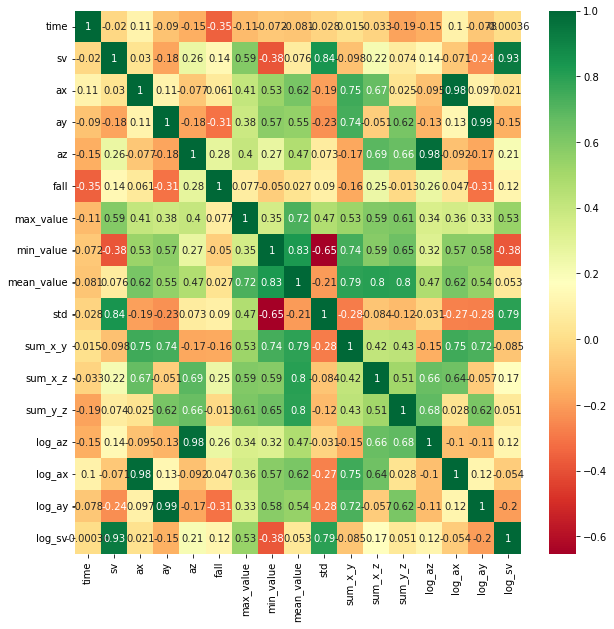

In [277]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [278]:
df.insert(0, 'fall', df.pop('fall'))
X = df.loc[:, 'sv':'log_sv'].values
y = df.loc[:, 'fall'].values
df

,fall,time,sv,ax,ay,az,max_value,min_value,mean_value,std,sum_x_y,sum_x_z,sum_y_z,log_az,log_ax,log_ay,log_sv
0,0,4693,0.931092,-0.929688,-0.015137,0.048828,0.048828,-0.929688,-0.298665,0.547416,-0.944824,-0.880859,0.033691,2.208070,2.009004,2.013936,0.618138
1,0,2348,0.970360,-0.282247,0.514136,0.773046,0.773046,-0.282247,0.334978,0.549985,0.231889,0.490800,1.287182,2.284661,2.092275,2.082190,0.639080
2,0,436,0.897787,-0.883301,0.134766,0.087402,0.134766,-0.883301,-0.220378,0.574597,-0.748535,-0.795898,0.222168,2.212301,2.015206,2.033744,0.600025
3,0,5336,1.116076,0.343167,0.930751,-0.511434,0.930751,-0.511434,0.254161,0.725200,1.273917,-0.168267,0.419317,2.144512,2.166621,2.132821,0.713172
4,0,2355,0.923263,-0.016950,0.922644,-0.029232,0.922644,-0.029232,0.292154,0.546055,0.905695,-0.046181,0.893412,2.199453,2.124490,2.131860,0.613909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18165,0,5522,0.942763,-0.085485,0.775748,-0.528875,0.775748,-0.528875,0.053796,0.663370,0.690264,-0.614359,0.246874,2.142467,2.116266,2.114282,0.624408
18166,1,3344,1.061216,-0.484413,-0.310496,0.891693,0.891693,-0.484413,0.032261,0.749352,-0.794909,0.407280,0.581197,2.296668,2.067010,1.973718,0.685918
18167,0,422,1.115102,0.008106,1.111791,-0.085485,1.111791,-0.085485,0.344804,0.665877,1.119898,-0.077378,1.026307,2.193197,2.127479,2.154047,0.712695
18168,1,177,0.933604,-0.088678,0.806945,0.461076,0.806945,-0.088678,0.393115,0.451663,0.718267,0.372398,1.268022,2.252384,2.115882,2.118041,0.619490


In [279]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.799


In [280]:
pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8766513526536663
{'svc__C': 1.0, 'svc__gamma': 10.0, 'svc__kernel': 'rbf'}


In [281]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), 
                                      np.std(scores)))

CV accuracy: 0.836 +/- 0.003


In [282]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]
clf = GridSearchCV(RandomForestClassifier(), forest_params, cv = 10, scoring='accuracy')
scores = cross_val_score(clf, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), 
                                      np.std(scores)))

/home/carolps/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/home/carolps/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/carolps/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/home/carolps/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/carolps/.local

/home/carolps/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/home/carolps/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/carolps/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/home/carolps/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/carolps/.local

CV accuracy: 0.870 +/- 0.005


In [283]:
'''from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
# load the dataset

data = df.values
X, y = data[:, 1:-1], data[:, -1]
# minimally prepare dataset
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('int'))
# transforms for the feature union
transforms = list()
transforms.append(('ss', StandardScaler()))
transforms.append(('pca', PCA(n_components=7)))
# create the feature union
fu = FeatureUnion(transforms)
# define the feature selection
rfe = RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=3)
# define the model
model = LogisticRegression(solver='liblinear')
# define the pipeline
steps = list()
steps.append(('fu', fu))
steps.append(('m', model))
pipeline = Pipeline(steps=steps)
# define the cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))'''

"from numpy import mean\nfrom numpy import std\nfrom pandas import read_csv\nfrom sklearn.model_selection import RepeatedStratifiedKFold\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.pipeline import FeatureUnion\nfrom sklearn.preprocessing import LabelEncoder\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.preprocessing import RobustScaler\nfrom sklearn.preprocessing import QuantileTransformer\nfrom sklearn.preprocessing import KBinsDiscretizer\nfrom sklearn.feature_selection import RFE\nfrom sklearn.decomposition import PCA\nfrom sklearn.decomposition import TruncatedSVD\n# load the dataset\n\ndata = df.values\nX, y = data[:, 1:-1], data[:, -1]\n# minimally prepare dataset\nX = X.astype('float')\ny = LabelEncoder().fit_transform(y.astype('int'))\n# transforms for the feature union\ntransforms = list()\ntransfor